## Import libraries

In [1]:
from pathlib import Path
import isthmuslib as isli

## Indicate path of data

In [2]:
audio_path: Path = Path.cwd() / 'data' / 'tB-kOE__X2o.csv'  # https://www.youtube.com/watch?v=tB-kOE__X2o

## Indicate the start and stop times of experiment

In [3]:
start_time_sec: float = 2 * 60 + 40
stop_time_sec: float = 3 * 60 + 10
audio_duration_sec: float = 5 * 60 + 33

## Tweak environment

(disable scrolling)

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Load in the data

In [5]:
full_recording: isli.Timeseries = isli.Timeseries(basis_col_name='timestamp')
full_recording.read_csv(audio_path)
full_recording.data.rename(columns={'Unnamed: 0':'sample_index'}, inplace=True)
full_recording.data['timestamp'] = full_recording.data['sample_index'] * audio_duration_sec / len(full_recording)

## Review data

In [6]:
full_recording.data.describe()

,sample_index,signal,timestamp
count,5.328144e+06,5.328144e+06,5.328144e+06
mean,2.664072e+06,7.559725e-07,1.665000e+02
std,1.538103e+06,4.491217e-02,9.612883e+01
min,0.000000e+00,-7.905719e-01,0.000000e+00
25%,1.332036e+06,-1.028754e-02,8.324998e+01
50%,2.664072e+06,-1.154585e-04,1.665000e+02
75%,3.996107e+06,8.776392e-03,2.497500e+02
max,5.328143e+06,8.604704e-01,3.329999e+02


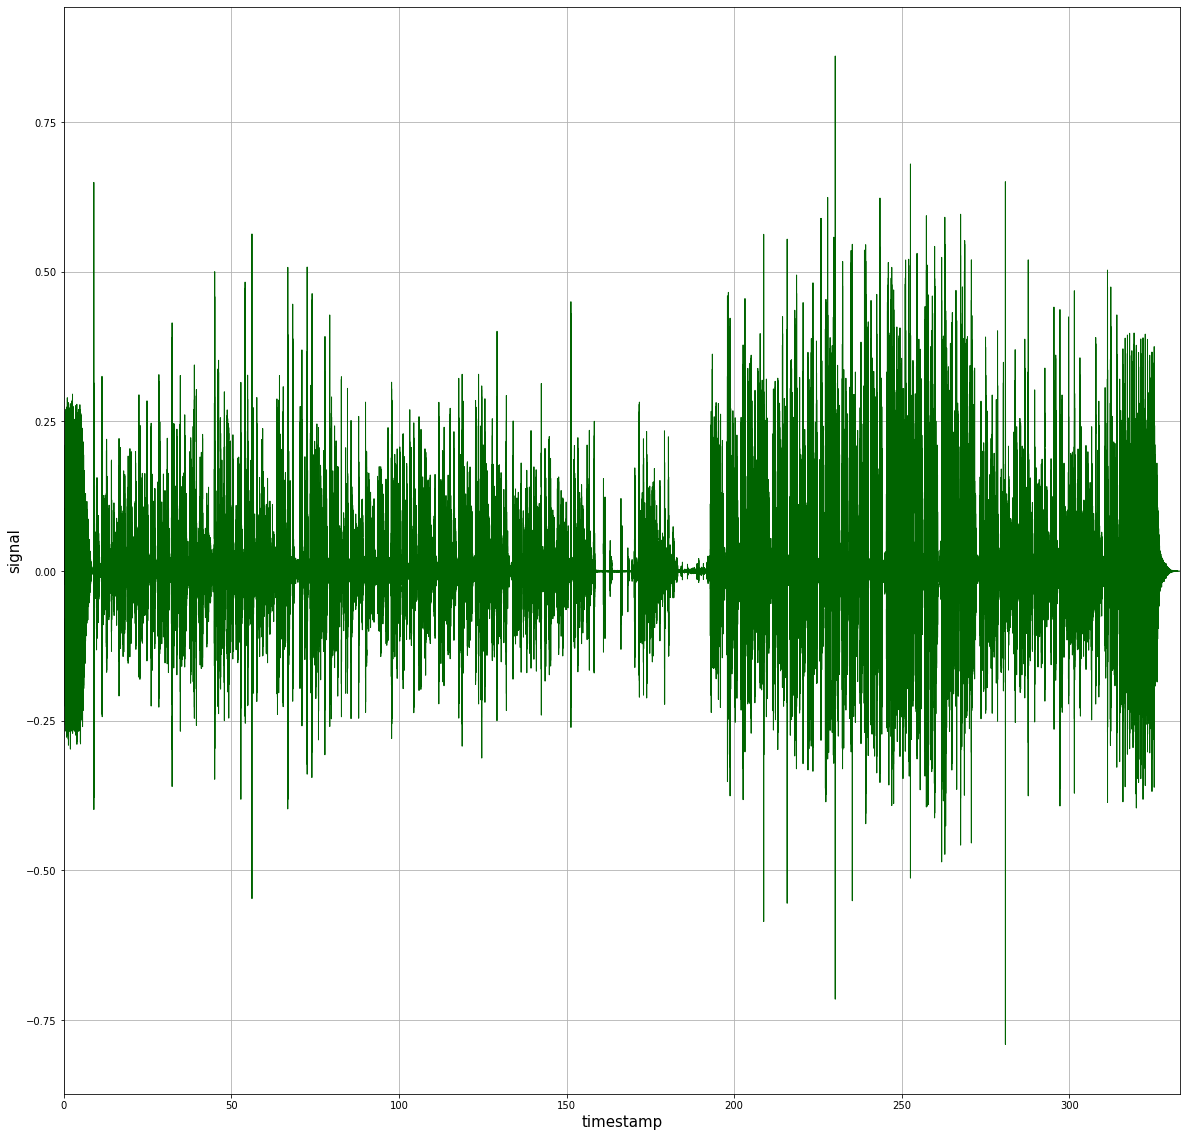

In [7]:
full_recording.plot('signal', linewidth=1, figsize=(20, 20));

## Trim down to a 30 sec experiment

In [8]:
experiment_high_rate: isli.VectorSequence = full_recording.slice(
    start_at=start_time_sec,
    stop_at=stop_time_sec,
    inplace=False,
    reset_index=True
)
experiment_high_rate.data.head()

,sample_index,signal,timestamp
0,2560070,0.000158,160.000051
1,2560071,0.000101,160.000113
2,2560072,0.000001,160.000176
3,2560073,-0.000064,160.000238
4,2560074,0.000059,160.000301


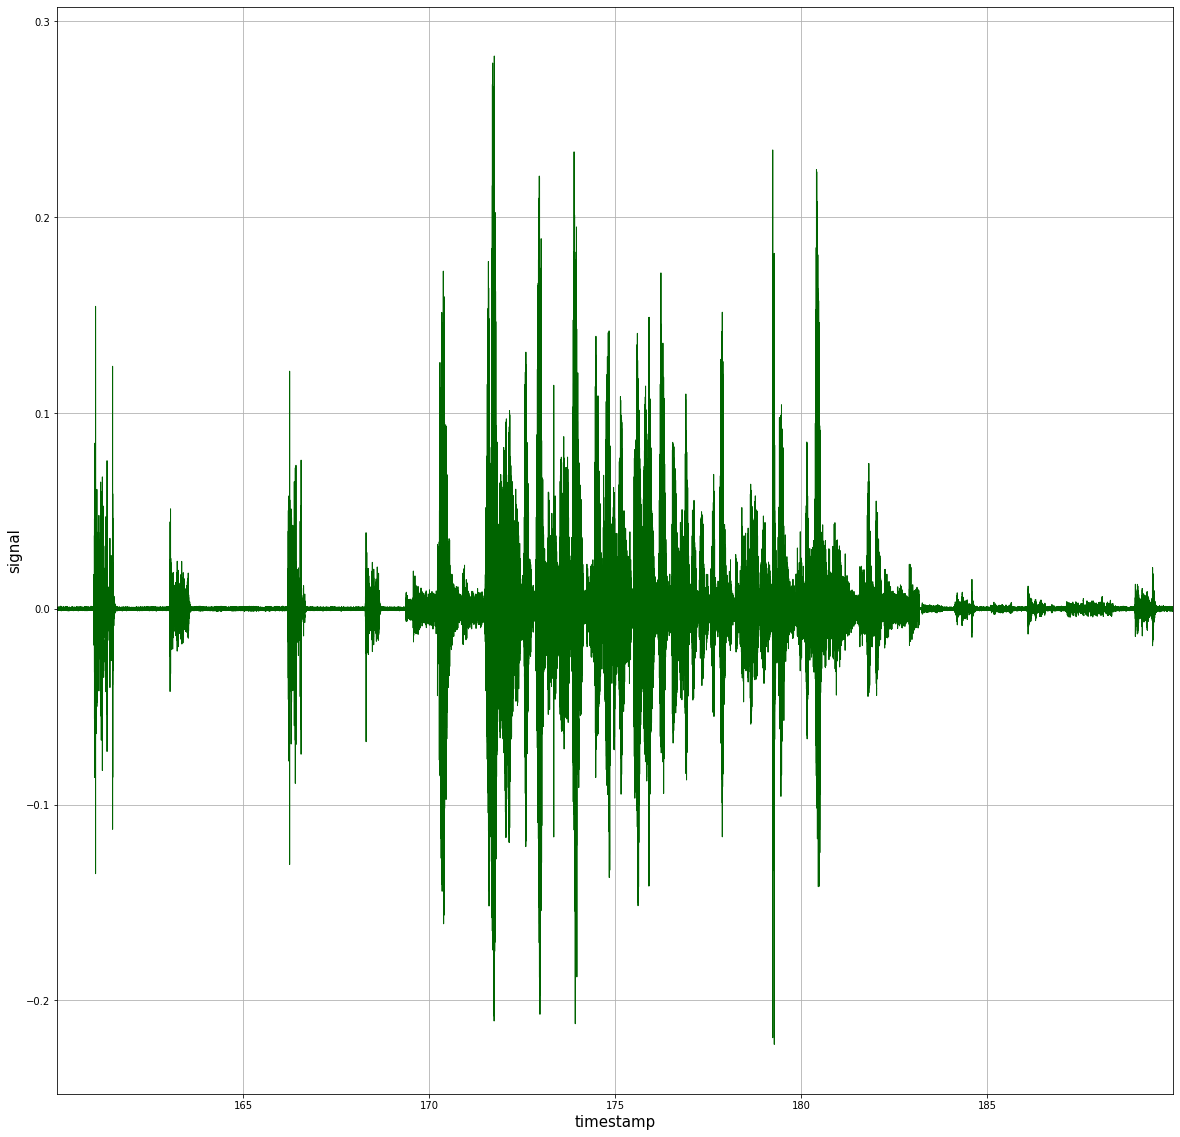

In [9]:
experiment_high_rate.plot('signal', linewidth=1, figsize=(20, 20));

## Look at just the autofocus noise

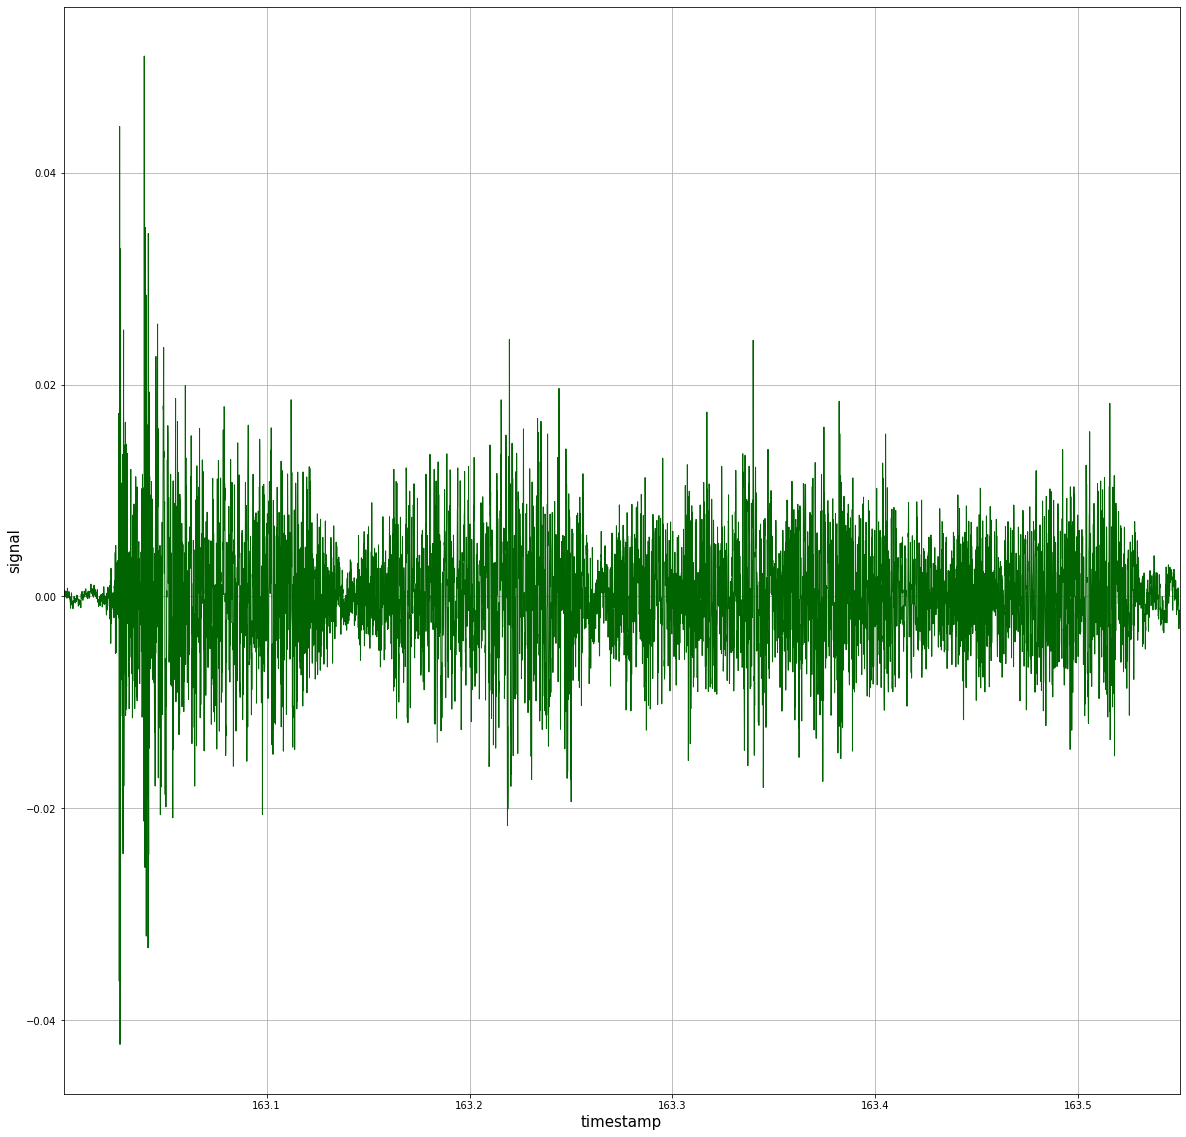

In [10]:
experiment_high_rate.slice(start_at=163, stop_at=163.55, inplace=False).plot('signal', linewidth=1, figsize=(20, 20));

## Downsample

In [11]:
experiment: isli.Timeseries = experiment_high_rate.downsample(
    interval=1/5_000,
    method='by_basis',
    inplace=False
)

## Apply matrix profiling methods

CPU times: user 45.1 s, sys: 577 ms, total: 45.7 s
Wall time: 44.8 s


/home/bird/Projects/GitHub/audio_artifact_detection_new/venv3.8/lib/python3.8/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


[({'mp': array([87.87140309, 87.87153058, 87.87038161, ..., 90.25244593,
          90.25193949, 90.25059551]),
   'pi': array([20868, 20869, 20870, ..., 95621, 95622, 95623]),
   'rmp': None,
   'rpi': None,
   'lmp': None,
   'lpi': None,
   'metric': 'euclidean',
   'w': 5000,
   'ez': 0,
   'join': False,
   'sample_pct': 1,
   'data': {'ts': array([ 5.9331243e-05, -4.2280057e-04, -5.0142820e-04, ...,
            5.8183694e-05,  2.4441758e-04,  3.8347743e-04]),
    'query': None},
   'class': 'MatrixProfile',
   'algorithm': 'mpx',
   'motifs': [{'motifs': [7117, 19973],
     'neighbors': [7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117]},
    {'motifs': [7117, 19973],
     'neighbors': [7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117,
      7117]},
    {'motifs': [7117, 19973],
     'neighbors': [7117,
      7117,
      7117,
      7117,
      7117,
      7117,
    

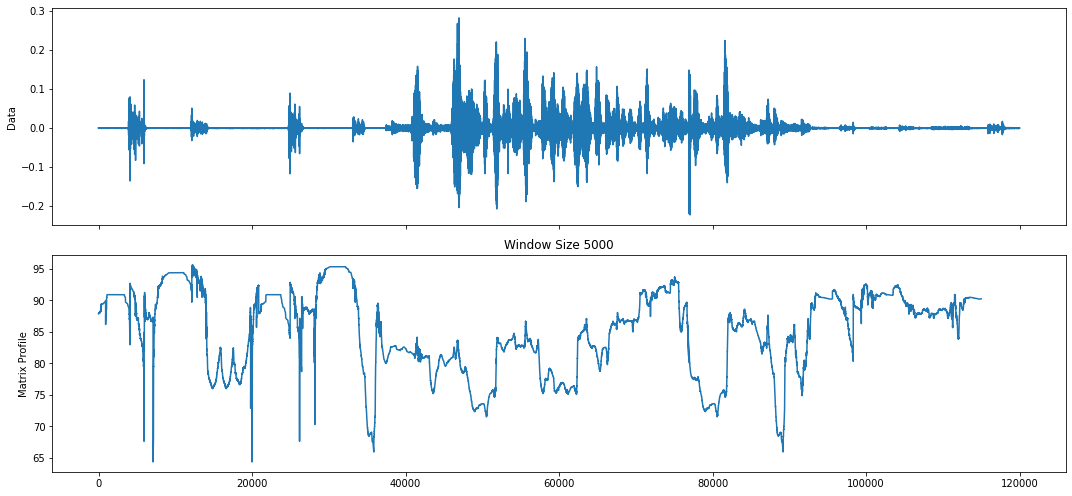

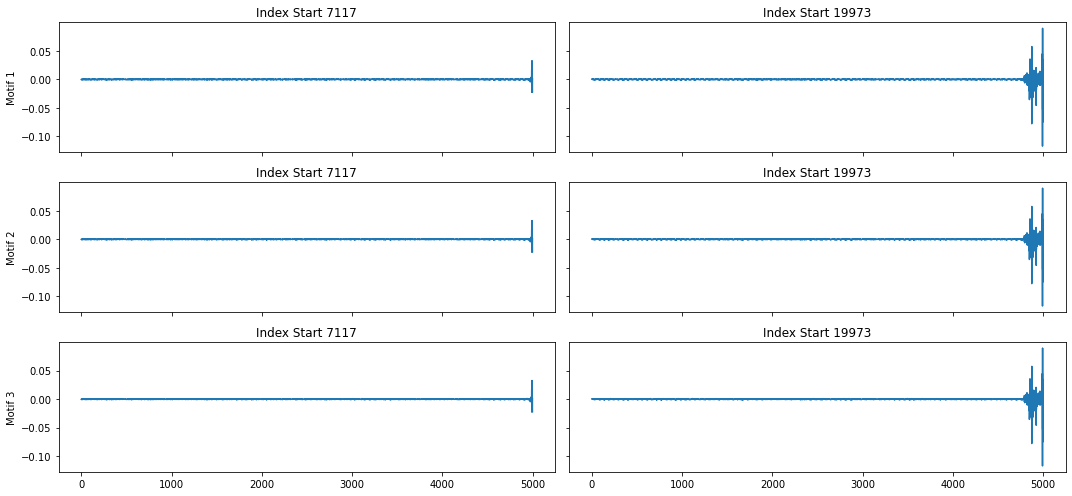

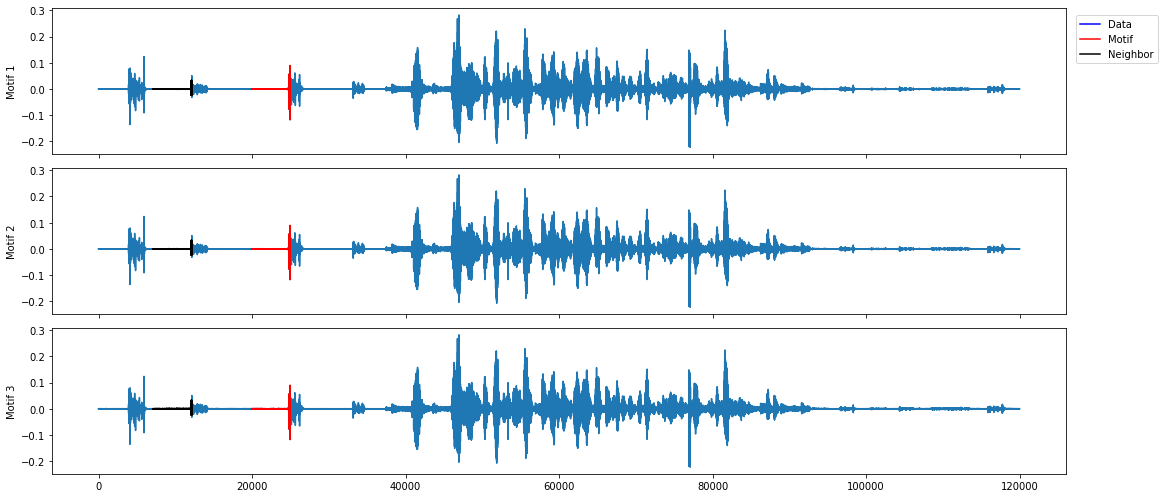

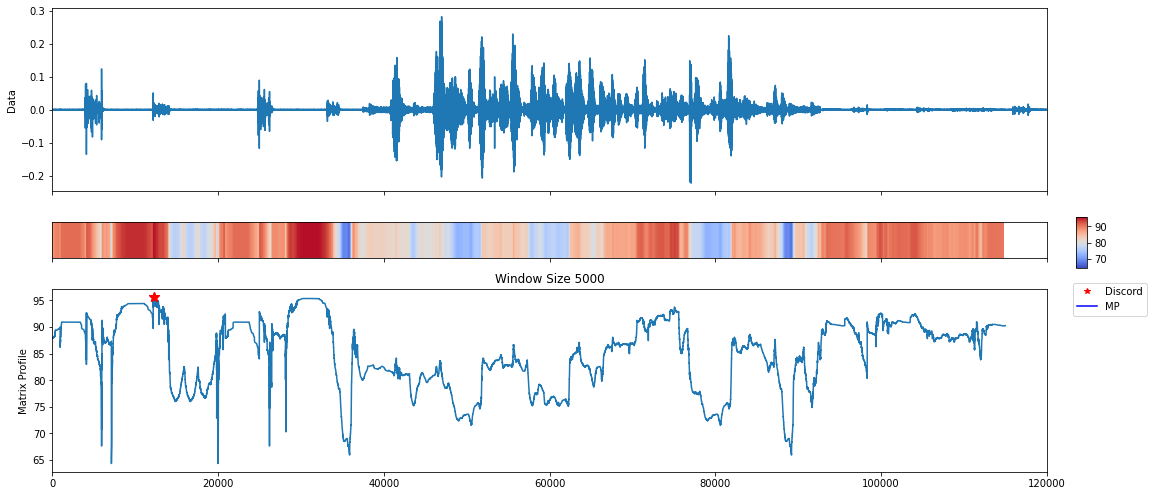

In [12]:
%%time
experiment.matrix_profile_univariate(windows=5_000, col_names='signal');